In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import imageio
from scipy import signal

# 1. Generate a sample noisy signal
np.random.seed(0)
t = np.linspace(0, 1, 500)
original_signal = signal.sawtooth(2 * np.pi * 5 * t)  # Original signal
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = original_signal + noise  # Noisy signal

# 2. Define wavelet and apply wavelet transform
wavelet = "db4"  # Daubechies wavelet
coeffs = pywt.wavedec(noisy_signal, wavelet, level=5)

# 3. Denoising by thresholding coefficients
threshold = 0.3  # Set threshold for denoising
coeffs_thresholded = [pywt.threshold(c, threshold * max(c)) for c in coeffs]

# 4. Initialize list for frames
frames = []

# 5. Reconstruct the signal at each thresholding level and save each frame
for i in range(1, len(coeffs_thresholded) + 1):
    # Zero out coefficients above level i
    coeffs_temp = coeffs_thresholded[:i] + [
        np.zeros_like(c) for c in coeffs_thresholded[i:]
    ]
    denoised_signal = pywt.waverec(coeffs_temp, wavelet)

    # Plot the original, noisy, and partially denoised signal
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(t, noisy_signal, label="Noisy Signal", color="gray", alpha=0.6)
    ax.plot(t, original_signal, label="Original Signal", color="black", linestyle="--")
    ax.plot(t, denoised_signal, label=f"Wavelet Denoising (Level {i})", color="blue")
    ax.legend()
    ax.set_title(f"Wavelet Denoising Progression - Level {i}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")

    # Save frame as image in memory
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype="uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close(fig)  # Close figure to save memory

# 6. Save frames as a GIF
imageio.mimsave("wavelet_transform_denoising.gif", frames, fps=2)
print("GIF saved as 'wavelet_transform_denoising.gif'")

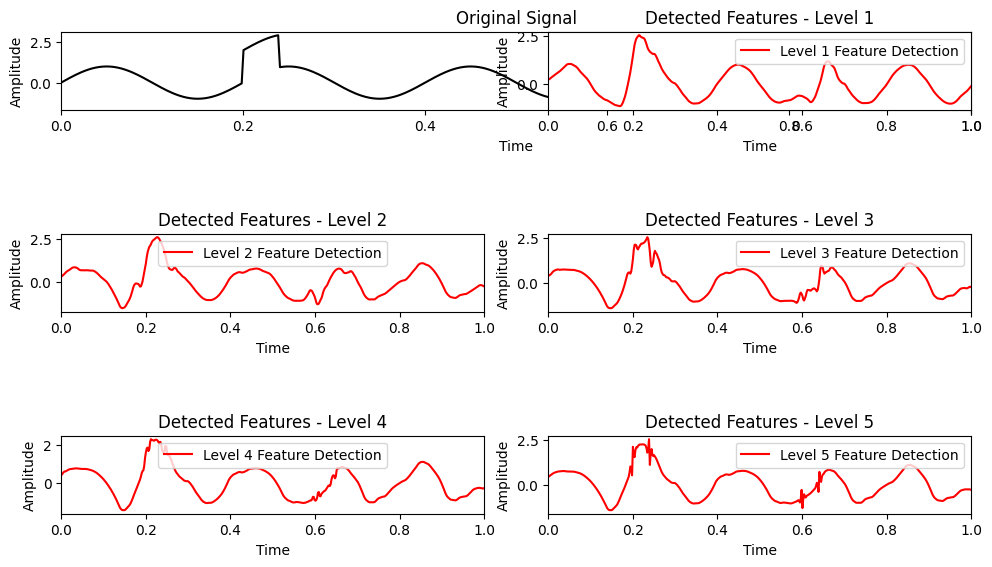

In [5]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Generate a synthetic signal with features
np.random.seed(0)
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)  # Base signal (5 Hz)
signal[100:120] += 2  # Add a spike (feature at t=0.2)
signal[300:320] -= 1.5  # Add another feature (t=0.6)

# Perform wavelet decomposition (using Daubechies 4 wavelet)
wavelet = "db4"
max_level = 5  # Maximum decomposition level
coeffs = pywt.wavedec(signal, wavelet, level=max_level)

# Plot the original signal with features
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label="Original Signal with Features", color="black")
plt.title("Original Signal")
plt.xlim(0, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Plot the wavelet transform coefficients at different levels
for i in range(1, max_level + 1):
    plt.subplot(3, 2, i + 1)
    # Plot detail coefficients for the current level
    # Zero out other levels to highlight the current level's detail coefficients
    coeffs_temp = [
        coeffs[0] if j == 0 else np.zeros_like(coeff) for j, coeff in enumerate(coeffs)
    ]
    coeffs_temp[i] = coeffs[i]  # Keep the detail coefficients for level i

    # Reconstruct the signal using only the current level's details
    feature_detection = pywt.waverec(coeffs_temp, wavelet)
    plt.plot(
        t,
        feature_detection[: len(signal)],
        label=f"Level {i} Feature Detection",
        color="red",
    )
    plt.title(f"Detected Features - Level {i}")
    plt.xlim(0, 1)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_2924/1069217383.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


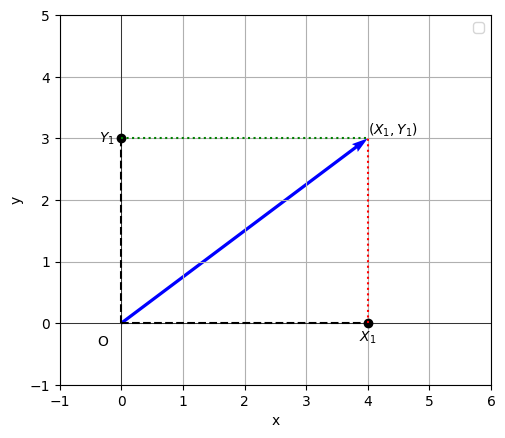

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración del vector
vx, vy = 4, 3  # Componentes del vector

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Dibujar los ejes
ax.axhline(0, color="black", linewidth=0.5)
ax.axvline(0, color="black", linewidth=0.5)

# Dibujar el vector
ax.quiver(
    0,
    0,
    vx,
    vy,
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
)

# Dibujar el vector con estilo de línea punteada
ax.plot([0, vx], [0, 0], "k--")  # Línea punteada para el vector
ax.plot(vx, 0, "ko")  # Punto en el extremo del vector
ax.plot([0, 0], [0, vy], "k--")  # Línea punteada para el vector
ax.plot(0, vy, "ko")  # Punto en el extremo del vector

# Dibujar las proyecciones en los ejes
ax.plot([vx, vx], [0, vy], "r:")
ax.plot([0, vx], [vy, vy], "g:")

# Etiquetas para las proyecciones
ax.text(vx, -0.1, r"$X_1$", ha="center", va="top")
ax.text(-0.1, vy, r"$Y_1$", ha="right", va="center")
ax.text(vx, vy, r"$(X_1, Y_1)$", ha="left", va="bottom")
ax.text(-0.3, -0.3, "O", ha="center", va="center")

# Configurar los límites de la gráfica
ax.set_xlim(-1, vx + 2)
ax.set_ylim(-1, vy + 2)

# Añadir etiquetas y leyendas
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

# Configurar la cuadrícula
ax.grid(True)
ax.set_aspect("equal")

# Mostrar el gráfico
plt.show()

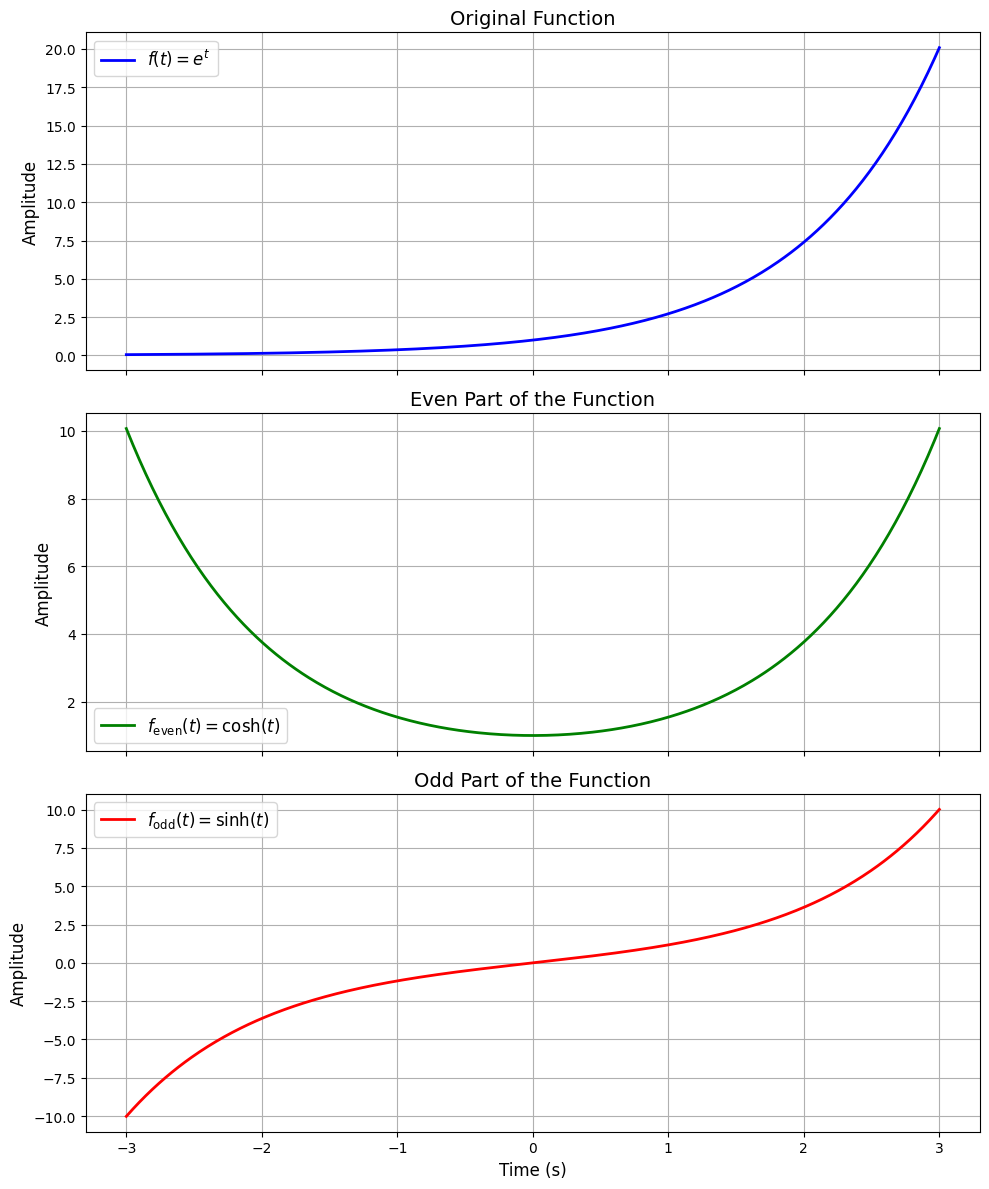

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(-3, 3, 500)

# Define the original function and its components
f_t = np.exp(t)  # Original function: e^t
f_even = (np.exp(t) + np.exp(-t)) / 2  # Even part: cosh(t)
f_odd = (np.exp(t) - np.exp(-t)) / 2  # Odd part: sinh(t)

# Create the subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot the original function
axs[0].plot(t, f_t, label=r"$f(t) = e^t$", color="blue", linewidth=2)
axs[0].set_title("Original Function", fontsize=14)
axs[0].set_ylabel("Amplitude", fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# Plot the even part
axs[1].plot(
    t, f_even, label=r"$f_{\text{even}}(t) = \cosh(t)$", color="green", linewidth=2
)
axs[1].set_title("Even Part of the Function", fontsize=14)
axs[1].set_ylabel("Amplitude", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Plot the odd part
axs[2].plot(t, f_odd, label=r"$f_{\text{odd}}(t) = \sinh(t)$", color="red", linewidth=2)
axs[2].set_title("Odd Part of the Function", fontsize=14)
axs[2].set_xlabel("Time (s)", fontsize=12)
axs[2].set_ylabel("Amplitude", fontsize=12)
axs[2].legend(fontsize=12)
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [1]:
import requests

response = requests.get(
    "https://charts-spotify-com-service.spotify.com/public/v0/charts"
)

data = response.json()

for entry in response.json()["chartEntryViewResponses"][0]["entries"]:
    meta = entry["trackMetadata"]
    entry = entry["chartEntryData"]

    track = meta["trackName"]
    artists = ", ".join([artist["name"] for artist in meta["artists"]])

    print(f"{entry['currentRank']:3} | {track:50} | {artists}")

  1 | DtMF                                               | Bad Bunny
  2 | Die With A Smile                                   | Lady Gaga, Bruno Mars
  3 | APT.                                               | ROSÉ, Bruno Mars
  4 | BAILE INoLVIDABLE                                  | Bad Bunny
  5 | NUEVAYoL                                           | Bad Bunny
  6 | BIRDS OF A FEATHER                                 | Billie Eilish
  7 | That’s So True                                     | Gracie Abrams
  8 | VOY A LLeVARTE PA PR                               | Bad Bunny
  9 | EoO                                                | Bad Bunny
 10 | VeLDÁ                                              | Bad Bunny, Omar Courtz, Dei V
 11 | Messy                                              | Lola Young
 12 | Who                                                | Jimin
 13 | luther (with sza)                                  | Kendrick Lamar, SZA
 14 | WELTiTA                                    

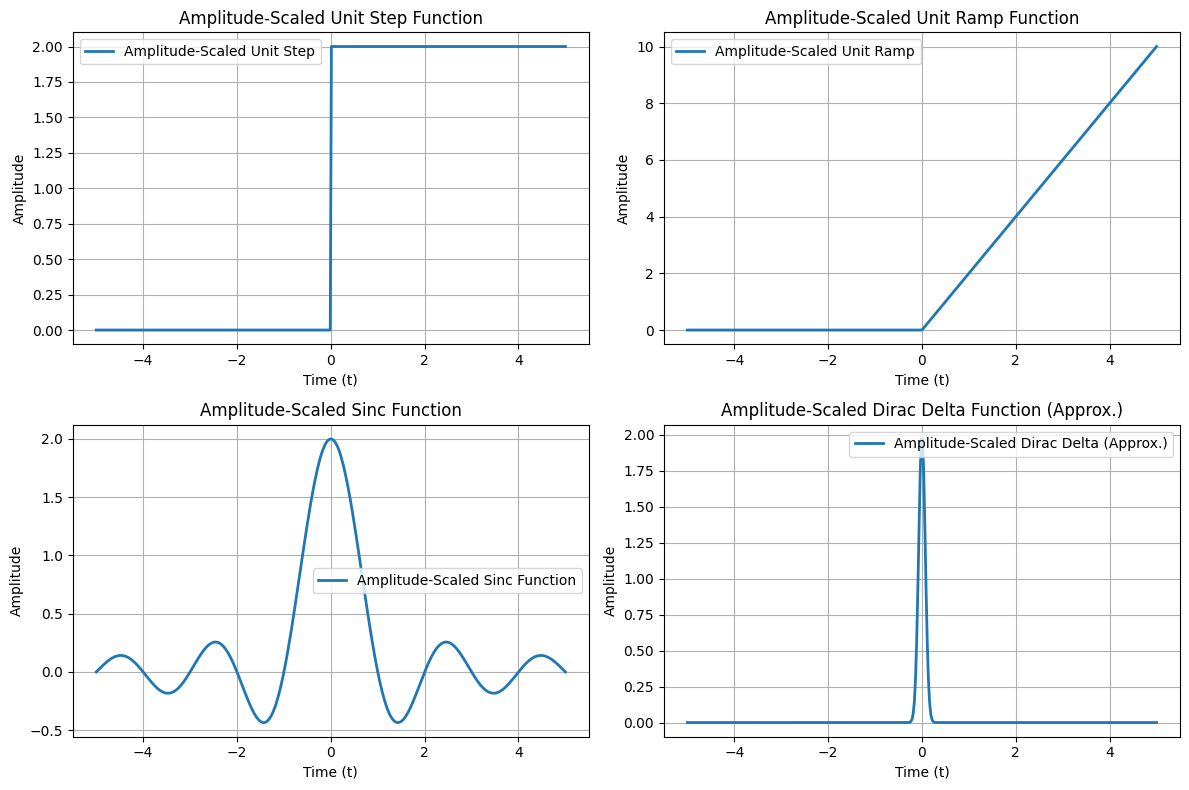

In [13]:
import numpy as np
import matplotlib.pyplot as plt

beta = 2  # Amplitude scaling factor
t = np.linspace(-5, 5, 400)

# Scaled functions
u_t = beta * np.heaviside(t, 1)  # Amplitude-Scaled Unit Step
r_t = beta * np.maximum(t, 0)  # Amplitude-Scaled Unit Ramp
sinc_t = beta * np.sinc(t)  # Amplitude-Scaled Sinc
delta_t = beta * np.exp(-100 * t**2)  # Amplitude-Scaled Dirac Delta (approximated)

# Plot all functions in a single figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Unit Step Function
axes[0, 0].plot(t, u_t, label="Amplitude-Scaled Unit Step", linewidth=2)
axes[0, 0].set_title("Amplitude-Scaled Unit Step Function")
axes[0, 0].set_xlabel("Time (t)")
axes[0, 0].set_ylabel("Amplitude")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Unit Ramp Function
axes[0, 1].plot(t, r_t, label="Amplitude-Scaled Unit Ramp", linewidth=2)
axes[0, 1].set_title("Amplitude-Scaled Unit Ramp Function")
axes[0, 1].set_xlabel("Time (t)")
axes[0, 1].set_ylabel("Amplitude")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Sinc Function
axes[1, 0].plot(t, sinc_t, label="Amplitude-Scaled Sinc Function", linewidth=2)
axes[1, 0].set_title("Amplitude-Scaled Sinc Function")
axes[1, 0].set_xlabel("Time (t)")
axes[1, 0].set_ylabel("Amplitude")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Dirac Delta Function
axes[1, 1].plot(t, delta_t, label="Amplitude-Scaled Dirac Delta (Approx.)", linewidth=2)
axes[1, 1].set_title("Amplitude-Scaled Dirac Delta Function (Approx.)")
axes[1, 1].set_xlabel("Time (t)")
axes[1, 1].set_ylabel("Amplitude")
axes[1, 1].grid(True)
axes[1, 1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Amplitude')

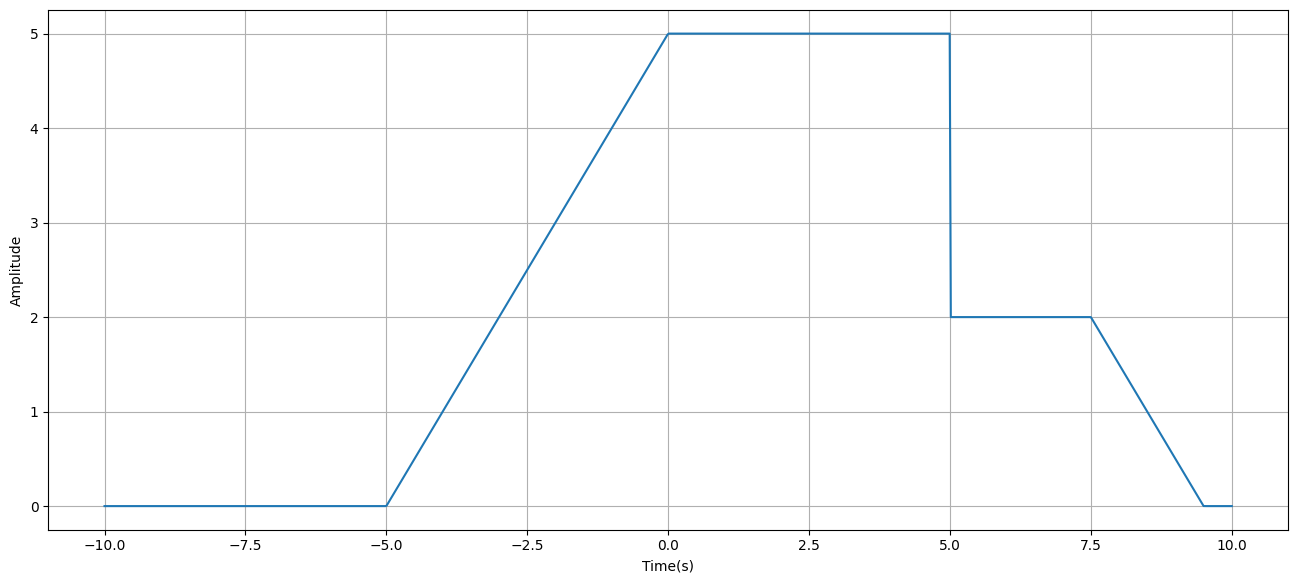

In [53]:
t = np.linspace(-10,10,1000)
x = np.zeros(t.shape)

x = (
    np.maximum(t + 5, 0)
    - np.maximum(t + 0, 0)
    - 3 * np.heaviside(t - 5, 1)
    - np.maximum(t - 7.5, 0)
    + np.maximum(t-9.5, 0)
)
plt.figure(figsize=(16,6.75))
plt.plot(t,x)
plt.grid()
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")